# A "Zero-Dimensional" Energy Balance Model of Earth's Climate



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Background: Climate Physics
A very basic climate model can be conceptualized as:

$$ \begin{align}
\text{\color{brown}{change in heat content}} = & + \text{\color{orange}{absorbed solar radiation (energy from the Sun's rays)}} 
\newline
& - \text{\color{blue}{outgoing thermal radiation (i.e. blackbody cooling to space)}}
\newline
& + \text{\color{grey}{human-caused greenhouse effect (trapped outgoing radiation)}}
\end{align}$$ 

where each of these is interpreted as an average over the entire globe (hence "zero-dimensional").

## Luminosity of the Sun and the Solar Constant

To find the luminosity of the Sun, we need to know the power radiated and the surface area. 

The power radiated by a black body at a given temperature is described by the Stefan-Boltzmann Law. 

$$I = \sigma T^4$$

where $\sigma$ is equal to $5.67*10^{-8} [\frac{W}{m^2 K^4}]$

The surface area of a sphere is simply:
$$A_{surface} = 4\pi r^2$$

So we can write the luminosity (units of W) as:

$$L = IA_{surface} = 4\pi r^2 \sigma T^4$$

If we plug in:

$r_{sun} = 6.957 * 10^8 [m]$

$T_{sun} = 5780 [K]$

$$L_{sun} = 3.85*10^{26} [W]$$

The amount of solar power that reaches the Earth is called the Solar Radiant Flux. Solar power follows the inverse square law, meaning that as we move further away from the power source, the solar intensity will decrease following an inverse square relationship. 

<center>

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/28/Inverse_square_law.svg)

</center>

The solar power must be spread of the surface of a sphere, so we can write:

$$S = \frac{L_{sun}}{4\pi r^2}$$

where this $r$ represents the distance from the source. If we use the mean orbital distance from the Earth to the Sun ($1.5*10^{11} [m]$)

$$S = 1362 \frac{W}{m^2}$$

This is known as the *Solar Constant* because the value is relatively stabe. Variations in this value due to changes in solar luminosity are in the range of 0.1%. 


## Earth's Energy Balance

We can first consider how the $\text{\color{orange}absorbed solar radiation}$ by Earth must be equal to the $\text{\color{yellow}emitted radiation}$ from Earth: 

$$ 4\pi r_{Earth}^2 \sigma T_{Earth}^4 = \pi r_{Earth}^2 S(1-\alpha )$$

where $\alpha$ represents the albedo of the Earth, which is the fraction that is reflected by the atmosphere or surface. This value will depend on location and cloud coverage, but the *average* for the Earth is typically given as 0.3. 

Reducing the equation gives us:

$${\color{yellow}\sigma T_{Earth}^4} = {\color{orange}\frac{S(1-\alpha)}{4}} $$

Using the above equation, we can solve for $T_{Earth}$ by plugging in the known values for $S, \sigma ,$ and $\alpha$.

In [2]:
# EBM

S = 1362    # solar constant, W m^-2
sigma = 5.67*10**(-8)   # W m^-2 K^-4
alpha = 0.3     # average albedo

T = (S*(1-alpha)/(4*sigma))**(1/4)

print("Temperature of Earth =", "{:.2f}".format(T), "(K)")

Temperature of Earth = 254.63 (K)


The average temperature of Earth today is about 288 K, so clearly this equation is incomplete. The $\text{\color{orange}absorbed solar radiation}$ part of the equation is okay so we must need to modify our outgoing radiation term by including more physics.


## Outgoing Thermal Radiation

The outgoing thermal radiation term $\mathcal{G}(T)$ (or "blackbody cooling to space") represents the combined effects of *negative feedbacks that dampen warming*, such as **blackbody radiation**, and *positive feedbacks that amplify warming*, such as the **water vapor feedback**.
Since these physics are too complicated to deal with here, we *linearize* the model by considering only the first term of a Taylor Series expansion
$\mathcal{G}(T) \approx \mathcal{G}(T_{0}) + \mathcal{G}'(T_{0})(T-T_{0}) = \mathcal{G}'(T_{0})T + (\mathcal{G}(T_{0}) - \mathcal{G}'(T_{0})(T_{0}))$
around the pre-industrial equilibrium temperature.

To simplify the expression, we define:
$$ \begin{align}
&A \equiv \mathcal{G}(T₀) - \mathcal{G}'(T₀)(T₀)
\newline 
&B \equiv -\mathcal{G}'(T₀) 
\end{align}$$

where $B$ gives the climate feedback parameter and has a value of -1.3 $\frac{W K}{m^2}$.

which gives:
$$\color{blue}{\text{outgoing thermal radiation} \equiv \mathcal{G}(T) \approx A - BT}$$

The value of $B$ comes from a bottom-up estimate based on the best understanding of the various climate feedbacks (read more [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwikwbfrm9LsAhVjhuAKHQhZCm8QFjAEegQIAhAC&url=https%3A%2F%2Fclimateextremes.org.au%2Fwp-content%2Fuploads%2F2020%2F07%2FWCRP_ECS_Final_manuscript_2019RG000678R_FINAL_200720.pdf&usg=AOvVaw0hWIM3t4kJTovxoeobcRIN)).

**Note:** Since $B < 0$, this tells us that the overall climate feedback is *negative* (i.e. stabilizing). Positivefeedbacks cause $B$ to become less negative, reducing the efficiency with which Earth cools itself by radiating thermal energy to space, and thus amplifying warming. 

The value of $A$ is given by the definition of a preindustrial equilibrium, i.e. before human influence, we assume Earth's energy budget was perfectly balanced:
$$\text{\color{orange}{absorbed solar radiation}} = \text{\color{blue}{outgoing thermal radiation}}$$

or

$${\color{orange}{\frac{S(1-\alpha)}{4}}}
= {\color{blue}{A - BT_{0}}}$$
By rearanging this equation, we find that the value of $A$ is given by:

In [3]:
T_0 = 287   # Preindustrial T (K)
B = -1.3    # Climate feedback (W/m^2/K)

A = S*(1-alpha)/4 + B*T_0

print("A =", "{:.2f}".format(A), "(W/m^2)")

A = -134.75 (W/m^2)


## Anthropogenic Greenhouse Effect

Empirically, the greenhouse effect is known to be a logarithmic function of gaseous carbon dioxide (CO₂) concentrations:

$\color{grey}{\text{human-caused greenhouse effect}\; = a \ln \left( \frac{[\text{CO}₂]}{[\text{CO}₂]_{\text{PI}}} \right),}$

where:

a = 5.0 (W/m^2) is the CO₂ forcing coefficient and CO2_PI = 280 is the preindustrial CO₂ concentration given in parts per million (ppm).

In [4]:
# GH effect 

a = 5.0     #W/m^2
CO2_PI = 280.    # ppm

def GHeffect(CO2):
    return a * np.log(CO2/CO2_PI)

Text(0.5, 1.0, 'Anthropogenic CO₂ Forcing')

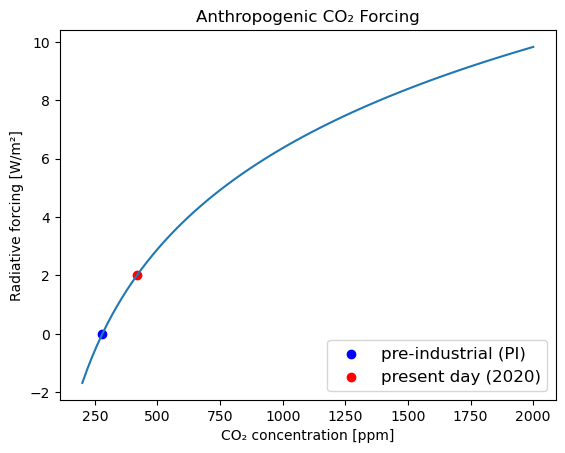

In [5]:
CO2_present = 420.
CO2_range = np.arange(200,2020,20)
fig, ax = plt.subplots()
p1 = ax.plot(CO2_range, GHeffect(CO2_range))
p2 = ax.scatter([CO2_PI], [GHeffect(CO2_PI)], color="blue")
p3 = ax.scatter([CO2_present], [GHeffect(CO2_present)], color="red")
legend = ax.legend((p2,p3),("pre-industrial (PI)", "present day (2020)"),loc='lower right', fontsize=12)
ax.set_ylabel("Radiative forcing [W/m²]")
ax.set_xlabel("CO₂ concentration [ppm]")
ax.set_title("Anthropogenic CO₂ Forcing")


In [6]:
print("Current anthropogenic Greenhouse Effect from CO₂ =", "{:.2f}".format(GHeffect(CO2_present)), "(W/m^2)")

Current anthropogenic Greenhouse Effect from CO₂ = 2.03 (W/m^2)


## Change in Heat Content

The heat content $CT$ is determined by the temperature $T$ (in Kelvin) and the heat capacity of the climate system. While we are interested in the temperature of the atmosphere, which has a very small heat capacity, its heat is closely coupled with that of the upper ocean, which has a much larger heat capacity of: 

In [7]:
C = 51  # atmosphere and upper-ocean heat capacity [J/m^2/°C]

The *change in heat content over time* is thus simply given by $\frac{d(CT)}{dt}$. Since the heat capacity of sea water hardly changes with temperature, we can rewrite this in terms of the change in temperature with time as:
$\color{brown}{\text{change in heat content } =\; C \frac{dT}{dt}}$

## "Zero-Dimensional" Climate Model Equation

Combining all of these subcomponent models, we write the governing equation of the "zero-dimensional" energy balance climate model as the **Ordinary Differential Equation (ODE)**:

$$\begin{gather}
{\color{brown}{C \frac{dT}{dt}}} = 
{\color{orange}{\frac{(1 - α)S}{4}}} - 
{\color{blue}{(A - BT)}} + 
{\color{grey}{a \ln \left( \frac{[\text{CO}₂]}{[\text{CO}₂]_{\text{PI}}} \right)}}
\end{gather}$$

which determines the time evolution of Earth's globally-averaged surface temperature.

## Preindustrial Equilibrium Model

We can solve our model for steady-state (no changing temperature) by setting the LHS of our equation to 0 and solving for T.

In [8]:
# Preindustrial Equilibrium

T_PE = A/B - (1-alpha)*S/(4*B) + (a/B)*np.log(1)

print("Preindustrial Equilibrium Temperature =", "{:.2f}".format(T_PE), "(K)")

Preindustrial Equilibrium Temperature = 287.00 (K)


# Numerical Solution

## Discretization

The energy balance model equation above can be **discretized** in time as:

$$C \frac{T(t+Δt) - T(t)}{\Delta t} = \frac{\left( 1-\alpha \right) S}{4} - (A - BT(t)) + a \ln \left( \frac{[\text{CO}₂](t)}{[\text{CO}₂]_{\text{PI}}} \right)$$

Our **finite difference equation**, which results from a first-order truncation of the Taylor series expansion, approximates the exact **ordinary differential equation** above in the limit that $\Delta t \rightarrow 0$. 

In practice, we can keep decreasing $\Delta t$ until the solution converges within a tolerable error.

Hereafter, we use the subscript $n$ to denote the $n$-th timestep, where $T_{n+1} \equiv T(t_{n+1})$ denotes the temperature at the next timestep $t_{n+1} = t_{n} + \Delta t$.

By re-arranging the equation, we can solve for the temperature at the next timestep $n+1$ based on the known temperature at the present timestep $n$:

$$T_{n+1} = T_{n} + \frac{\Delta t}{C} \left[ \frac{ \left( 1-\alpha \right) S}{4} - (A - BT_{n}) + a \ln \left( \frac{[\text{CO}₂]_{n}}{[\text{CO}₂]_{\text{PI}}} \right) \right]$$


## Timestepping

More generally, we recognize this equation to be of the form:

$T_{n+1} = T_{n} + \Delta t * \text{tendency}(T_{n} \,; ...),$

which we implement below (don't forget to update the time as well: 

$t_{n+1} = t_{n} + \Delta t$

which takes in an instance of our anticipated energy balance model as its argument.

We can define the `tendency` as the sum of the various physical forcing mechanisms and is a function of the present temperature $T_{n}$, as well as a number of other parameters.


In [9]:
def tendency(T, CO2):
    return (1/C) * (((1-alpha)*S/4) - (A-B*T) + GHeffect(CO2))

# Energy Balance Model Applications

## Preindustrial Stability

We can test our model to evaluate overall stability by giving the Earth a different initial temperature and observing how the temperature evolves in time. 

In [10]:
# time span to evaluate model over
time = np.arange(0,201,1)   # 0 - 200 years, by 1 year intervals

# intial temperatures
T_i = np.arange(271,305,2)

# matrix containing calculated temperatures
T_f = (len(T_i), len(time))
T_f = np.zeros(T_f)     # set values to 0
T_f[:,0] = T_i          # set first column to initial temperatures

# size of time step
t_step = T_i[1] - T_i[0]

# loop to calculate temperatures
for i in range(len(T_i)):
    for j in range(len(time)-1):
        T_f[i,j+1] = T_f[i,j] + t_step*tendency(T_f[i,j], CO2_PI)

Text(0.5, 1.0, 'Basic Climate Model')

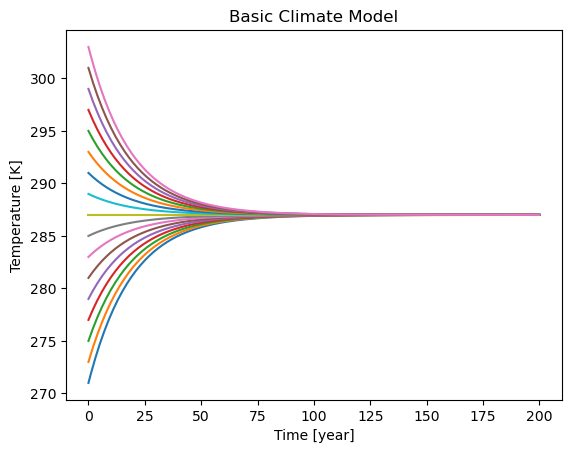

In [11]:
# create a plot of the temperatures over time
fig, ax = plt.subplots()
for i in range(len(T_i)):
    ax.plot(time, T_f[i,:])
ax.set_ylabel("Temperature [K]")
ax.set_xlabel("Time [year]")
ax.set_title("Basic Climate Model")

Our model shows that temperatures tend towards the preindustrial equilibrium temperature of 287 K. This makes sense due to the fact that our $\color{blue}{\text{outgoing thermal radiation}}$ term is compensating to reduce the global temperature if it's higher than 287 K or increase the global temperature if it's lower than 287 K. 

## Historical Global Warming Fueled by Greenhouse Gas Emissions

Human greenhouse gas emissions have fundamentally altered Earth's energy balance, moving us away from the stable preindustrial climate of the past few thousand years.
Since human CO₂ emissions are the main driver of global warming, we expect that if we plug historical CO₂ increases into our model ("forcing" it), we should roughly reproduce the observed historical global warming.

The observed increase of CO₂ concentrations can be fairly accurately modelled by the simple cubic formula below:

In [12]:
def CO2_hist(t):
    return CO2_PI * (1. + fractional_increase(t))

def fractional_increase(t):
    return ((t - 1850.)/220)**3

Feeding this CO₂ function into our model, we can run it forward from 1850 to 2025 to try and simulate the amount of global warming that observed over this historical period.


Text(0.5, 1.0, 'Modeled Atmospheric CO₂')

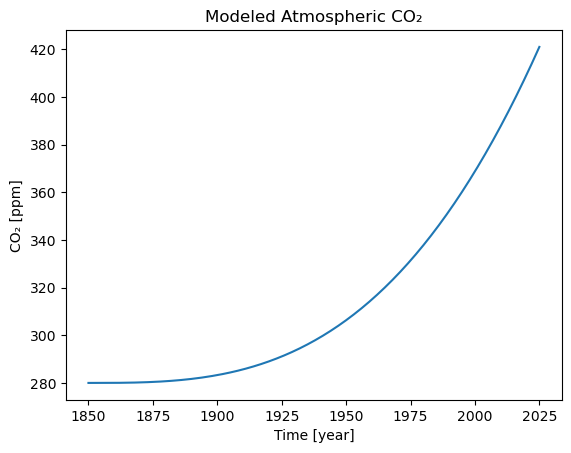

In [13]:
time = np.arange(1850,2026,1)

CO2 = CO2_hist(time)

fig, ax = plt.subplots()
ax.plot(time, CO2)
ax.set_ylabel("CO₂ [ppm]")
ax.set_xlabel("Time [year]")
ax.set_title("Modeled Atmospheric CO₂")

2022 Modeled Mean Global CO₂ and Temperature:  416.15 [ppm], 287.90 [K]


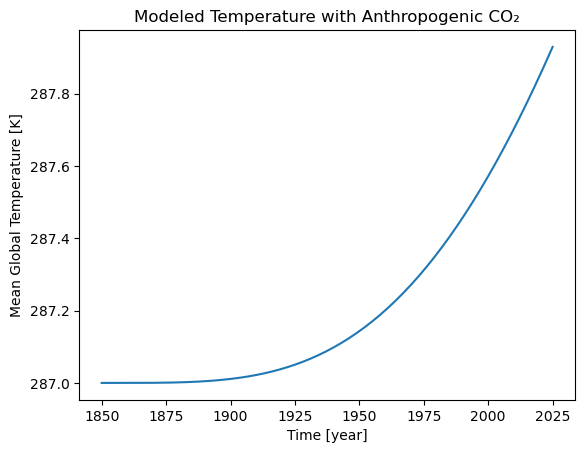

In [14]:
T_f = np.zeros(len(time))
T_f[0] = T_0

t_step = time[1] - time[0]

for j in range(len(time)-1):
    T_f[j+1] = T_f[j] + t_step*tendency(T_f[j], CO2[j])

fig, ax = plt.subplots()
ax.plot(time, T_f)
ax.set_ylabel("Mean Global Temperature [K]")
ax.set_xlabel("Time [year]")
ax.set_title("Modeled Temperature with Anthropogenic CO₂")

print("2022 Modeled Mean Global CO₂ and Temperature: ", "{:.2f}".format(CO2[-3]), "[ppm],","{:.2f}".format(T_f[-3]), "[K]")

How does our model compare again observed values? Why might our values be incorrect? How could we potentially improve our predictions?

Our model ...
